##### Copyright 2018 The TensorFlow Hub Authors.

Licensed under the Apache License, Version 2.0 (the "License");

In [0]:
# Copyright 2018 The TensorFlow Hub Authors. All Rights Reserved.
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
# ==============================================================================

## Fashion MNIST with Keras and TPUs

## Overview

In this example, you can try out using tf.keras and Cloud TPUs to train a model on the fashion MNIST dataset. The model trains for 10 epochs on Cloud TPU and takes approximately 2 minutes to run.

This notebook is hosted on GitHub. To view it in its original repository, after opening the notebook, select **File > View on GitHub**.

## Learning objectives

In this Colab, you will learn how to:
*   Code for a standard conv-net that has 3 layers with drop-out and batch normalization between each layer in Keras.
*   Create and compile the model under a distribution strategy in order ot use TPUs.
*   Run a prediction to see how well the model can predict fashion categories and output the result.

## Instructions

<h3>  &nbsp;&nbsp;Train on TPU&nbsp;&nbsp; <a href="https://cloud.google.com/tpu/"><img valign="middle" src="https://raw.githubusercontent.com/GoogleCloudPlatform/tensorflow-without-a-phd/master/tensorflow-rl-pong/images/tpu-hexagon.png" width="50"></a></h3>

1. On the main menu, click Runtime and select **Change runtime type**. Set "TPU" as the hardware accelerator.
1. Click Runtime again and select **Runtime > Run All**. You can also run the cells manually with Shift-ENTER. 

TPUs are located in Google Cloud, for optimal performance, they read data directly from Google Cloud Storage (GCS)

## Data, model, and training

Begin by downloading the fashion MNIST dataset using `tf.keras.datasets`, as shown below.

In [1]:
import tensorflow as tf
import numpy as np


import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from keras.initializers import glorot_uniform
from keras.optimizers import Adam, Adadelta, Adagrad
from keras.models import Sequential

batch_size = 128
num_classes = 10
epochs = 12


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# add empty color dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.
x_test = x_test / 255.

y_train = keras.utils.to_categorical(y_train, num_classes)


40960/29515 [=========================================] - 0s 0us/step


Using TensorFlow backend.


4431872/4422102 [==============================] - 0s 0us/step


### Define the model

The following example uses a standard conv-net that has 3 layers with drop-out and batch normalization between each layer.

In [0]:
relu = tf.nn.relu
leaky_relu = tf.nn.leaky_relu
softmax = tf.nn.softmax
tanh = tf.nn.tanh
sigmoid = tf.nn.sigmoid
adam = keras.optimizers.Adam(0.001)


def run_model(x_train, y_train, batch_size, epochs, optimizer, loss='categorical_crossentropy', ):
    
    model = Sequential()

    model.add(Conv2D(32, (3, 3), padding='same', activation = relu))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())    

    model.add(Conv2D(64, (3, 3), padding='same', activation = relu))
    model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
    model.add(BatchNormalization())
    
    model.add(Conv2D(128, (3, 3), padding='same', activation = relu))
    model.add(Dropout(0.25))
    model.add(BatchNormalization())
    
    model.add(Conv2D(128, (3, 3), padding='same', activation = relu))
    model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
    model.add(BatchNormalization())


    model.add(Flatten())
    model.add(Dense(256, activation = relu, kernel_initializer='glorot_uniform'))
    model.add(Dropout(0.20))
    model.add(Dense(128, activation = relu, kernel_initializer='glorot_uniform'))
#     model.add(Dropout(0.25))
    model.add(Dense(10, activation = softmax))




    model.compile(loss=loss,
              optimizer=optimizer,
              metrics=['accuracy'])

    history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_split=0.1)
    return model, history

# run_model(x_train, y_train, 128, 15, optimizer='adam')
# run_model(x_train, y_train, 128, 15, optimizer='adadelta')





model, history = run_model(x_train, y_train, 128, 15, optimizer=adam)


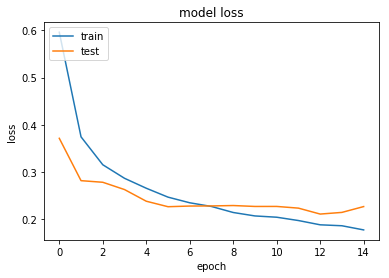

In [15]:

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()